## Explore the Data Observatory catalog

The Data Observatory is a a spatial data platform that enables Data Scientists to augment their data and broaden their analysis. It offers a wide range of datasets from around the globe in a spatial data repository.

This guide is intended for those who are going to start augmenting their own data using CARTOframes and are willing to explore our public Data Observatory catalog on the seek of the datasets that best fit their use cases and analyses.

**Note: The catalog is public and you don't need a CARTO account to search for available datasets**

### Looking for population data in the US in the catalog

In this guide we are going to filter the Data Observatory catalog looking for population data in the US.

The catalog is comprised of thousands of curated spatial datasets, so when searching for
data the easiest way to find out what you are looking for is make use of a feceted search. A faceted (or hierarchical) search allows you to narrow down search results by applying multiple filters based on faceted classification of the catalog datasets.

Datasets are organized in three main hirearchies:

- Country
- Category
- Geography (or spatial resolution)

For our analysis we are looking for a demographics dataset in the US with a spatial resolution at the level of block groups. 

First we can start for discovering which available geographies (orspatial resolutions) we have for demographics data in the US, by filtering the `catalog` by `country` and `category` and listing the available `geographies`:

In [77]:
from cartoframes.data.observatory import Catalog
geographies = Catalog().country('usa').category('demographics').geographies

In [78]:
geographies

[<Geography.get('mbi_blockgroups_1ab060a')>,
 <Geography.get('od_countyclipp_caef1ec9')>,
 <Geography.get('usct_censustract_784cc2ed')>,
 <Geography.get('od_zcta5clippe_6b6ff33c')>,
 <Geography.get('od_schooldistr_6d5c417f')>,
 <Geography.get('mbi_pc_5_digit_4b1682a6')>,
 <Geography.get('od_placeclippe_48a89947')>,
 <Geography.get('od_congression_6774ebb')>,
 <Geography.get('od_cbsaclipped_b6a32adc')>,
 <Geography.get('od_schooldistr_f70c7e28')>,
 <Geography.get('ags_q17_4739be4f')>,
 <Geography.get('od_pumaclipped_b065909')>,
 <Geography.get('mbi_counties_141b61cd')>,
 <Geography.get('mbi_county_subd_e8e6ea23')>,
 <Geography.get('od_censustract_5962fe30')>,
 <Geography.get('od_blockclippe_9c508438')>,
 <Geography.get('od_schooldistr_75493a16')>,
 <Geography.get('od_blockgroupc_3ab29c84')>,
 <Geography.get('od_stateclippe_8d79f5be')>,
 <Geography.get('ags_blockgroup_1c63771c')>]

Let's filter the geographies by those that contain information at the level of blockgroup. For that purpose we are converting the geographies to a pandas `DataFrame` and search for the string `blockgroup` in the `id` of the geographies:

In [6]:
df = geographies.to_dataframe()
df[df['id'].str.contains('blockgroup', case=False, na=False)]

,country_id,description,geom_coverage,id,is_public_data,lang,name,provider_id,provider_name,slug,summary_json,update_frequency,version
0,usa,MBI Digital Boundaries for USA at Blockgroups ...,01060000005A0100000103000000010000002900000013...,carto-do.mbi.geography_usa_blockgroups_2019,False,eng,USA - Blockgroups,mbi,Michael Bauer International,mbi_blockgroups_1ab060a,None,None,2019
17,usa,None,0106000020E61000000800000001030000000100000009...,carto-do-public-data.tiger.geography_usa_block...,True,eng,Topologically Integrated Geographic Encoding a...,open_data,Open Data,od_blockgroupc_3ab29c84,None,None,2015
19,usa,None,0106000020E61000000800000001030000000100000009...,carto-do.ags.geography_usa_blockgroup_2015,False,eng,USA Census Block Group,ags,Applied Geographic Solutions,ags_blockgroup_1c63771c,None,None,2015


We have three available datasets, from three different providers: Michael Bauer International, Open Data and AGS. For this example, we are going to look for demographic datasets for the AGS blockgroups geography `ags_blockgroup_1c63771c`:

In [7]:
datasets = Catalog().country('usa').category('demographics').geography('ags_blockgroup_1c63771c').datasets
datasets

[<Dataset.get('ags_sociodemogr_e92b1637')>,
 <Dataset.get('ags_consumerspe_fe5d060a')>,
 <Dataset.get('ags_retailpoten_ddf56a1a')>,
 <Dataset.get('ags_consumerpro_e8344e2e')>,
 <Dataset.get('ags_businesscou_a8310a11')>,
 <Dataset.get('ags_crimerisk_9ec89442')>]

**Note that every time you search the catalog you create a new instance of the `Catalog` class**

We have 6 datasets in the US with demographics information at the level of AGS blockgroups:

In [8]:
datasets.to_dataframe()

,category_id,category_name,country_id,data_source_id,description,geography_description,geography_id,geography_name,id,is_public_data,lang,name,provider_id,provider_name,slug,summary_json,temporal_aggregation,time_coverage,update_frequency,version
0,demographics,Demographics,usa,sociodemographic,Census and ACS sociodemographic data estimated...,None,carto-do.ags.geography_usa_blockgroup_2015,USA Census Block Group,carto-do.ags.demographics_sociodemographic_usa...,False,eng,Sociodemographic,ags,Applied Geographic Solutions,ags_sociodemogr_e92b1637,"{'counts': {'rows': 217182, 'cells': 23672838,...",yearly,"[2019-01-01,2020-01-01)",None,2019
1,demographics,Demographics,usa,consumerspending,The Consumer Expenditure database consists of ...,None,carto-do.ags.geography_usa_blockgroup_2015,USA Census Block Group,carto-do.ags.demographics_consumerspending_usa...,False,eng,Consumer Spending,ags,Applied Geographic Solutions,ags_consumerspe_fe5d060a,"{'counts': {'rows': 217182, 'cells': 27799296,...",yearly,"[2018-01-01,2019-01-01)",None,2018
2,demographics,Demographics,usa,retailpotential,The retail potential database consists of aver...,None,carto-do.ags.geography_usa_blockgroup_2015,USA Census Block Group,carto-do.ags.demographics_retailpotential_usa_...,False,eng,Retail Potential,ags,Applied Geographic Solutions,ags_retailpoten_ddf56a1a,"{'counts': {'rows': 217182, 'cells': 28450842,...",yearly,"[2018-01-01,2019-01-01)",None,2018
3,demographics,Demographics,usa,consumerprofiles,Segmentation of the population in sixty-eight ...,None,carto-do.ags.geography_usa_blockgroup_2015,USA Census Block Group,carto-do.ags.demographics_consumerprofiles_usa...,False,eng,Consumer Profiles,ags,Applied Geographic Solutions,ags_consumerpro_e8344e2e,"{'counts': {'rows': 217182, 'cells': 30839844,...",yearly,"[2018-01-01,2019-01-01)",None,2018
4,demographics,Demographics,usa,businesscounts,Business Counts database is a geographic summa...,None,carto-do.ags.geography_usa_blockgroup_2015,USA Census Block Group,carto-do.ags.demographics_businesscounts_usa_b...,False,eng,Business Counts,ags,Applied Geographic Solutions,ags_businesscou_a8310a11,"{'counts': {'rows': 217182, 'cells': 25410294,...",yearly,"[2018-01-01,2019-01-01)",None,2018
5,demographics,Demographics,usa,crimerisk,Using advanced statistical methodologies and a...,None,carto-do.ags.geography_usa_blockgroup_2015,USA Census Block Group,carto-do.ags.demographics_crimerisk_usa_blockg...,False,eng,Crime Risk,ags,Applied Geographic Solutions,ags_crimerisk_9ec89442,"{'counts': {'rows': 217182, 'cells': 2823366, ...",yearly,"[2018-01-01,2019-01-01)",None,2018


They comprise different information: consumer spending, retail potential, consumer profiles, etc.

At a first sight, it looks the dataset with `data_source_id: sociodemographic` might contain the population information we are looking for. Let's try to understand a little bit better what data this dataset contains by looking at its variables:

In [10]:
from cartoframes.data.observatory import Dataset
dataset = Dataset.get('ags_sociodemogr_e92b1637')
variables = dataset.variables
variables

[<Variable.get('POPPY_946f4ed6')>,
 <Variable.get('HINCYMED25_55670d8c')>,
 <Variable.get('HINCYMED45_33daa0a')>,
 <Variable.get('HINCYMED75_2810f9c9')>,
 <Variable.get('HINCYMED65_310bc888')>,
 <Variable.get('HINCYMED55_1a269b4b')>,
 <Variable.get('HINCYMED24_22603d1a')>,
 <Variable.get('INCCYMEDFA_59fa177d')>,
 <Variable.get('EDUCYBACH_c2295f79')>,
 <Variable.get('EDUCYSCOLL_1e8c4828')>,
 <Variable.get('EDUCYHSCH_b236c803')>,
 <Variable.get('EDUCYSHSCH_5c444deb')>,
 <Variable.get('EDUCYLTGR9_cbcfcc89')>,
 <Variable.get('MARCYDIVOR_32a11923')>,
 <Variable.get('MARCYWIDOW_7a2977e0')>,
 <Variable.get('MARCYMARR_26e07b7')>,
 <Variable.get('SEXCYFEM_d52acecb')>,
 <Variable.get('SEXCYMAL_ca14d4b8')>,
 <Variable.get('AGECYGT85_b9d8a94d')>,
 <Variable.get('AGECY8084_b25d4aed')>,
 <Variable.get('AGECY7579_15dcf822')>,
 <Variable.get('AGECY7074_6da64674')>,
 <Variable.get('AGECY6064_cc011050')>,
 <Variable.get('AGECY5559_8de3522b')>,
 <Variable.get('AGECY4549_2c44040f')>,
 <Variable.get('AGECY

In [12]:
from cartoframes.data.observatory import Dataset
vdf = variables.to_dataframe()
vdf

,agg_method,column_name,dataset_id,db_type,description,id,name,slug,starred,summary_json,variable_group_id
0,SUM,POPPY,carto-do.ags.demographics_sociodemographic_usa...,None,Population (2024A),carto-do.ags.demographics_sociodemographic_usa...,POPPY,POPPY_946f4ed6,False,"{'head': [0, 0, 8, 0, 0, 0, 4, 0, 2, 59], 'tai...",None
1,AVG,HINCYMED25,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Median Household Income: Age 25-34 (2019A),carto-do.ags.demographics_sociodemographic_usa...,HINCYMED25,HINCYMED25_55670d8c,False,"{'head': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tail...",None
2,AVG,HINCYMED45,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Median Household Income: Age 45-54 (2019A),carto-do.ags.demographics_sociodemographic_usa...,HINCYMED45,HINCYMED45_33daa0a,False,"{'head': [0, 0, 0, 55000, 0, 0, 0, 0, 0, 0], '...",None
3,AVG,HINCYMED75,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Median Household Income: Age 75+ (2019A),carto-do.ags.demographics_sociodemographic_usa...,HINCYMED75,HINCYMED75_2810f9c9,False,"{'head': [67500, 0, 0, 5000, 0, 0, 0, 0, 0, 0]...",None
4,AVG,HINCYMED65,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Median Household Income: Age 65-74 (2019A),carto-do.ags.demographics_sociodemographic_usa...,HINCYMED65,HINCYMED65_310bc888,False,"{'head': [67500, 0, 0, 25000, 0, 0, 0, 112500,...",None
5,AVG,HINCYMED55,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Median Household Income: Age 55-64 (2019A),carto-do.ags.demographics_sociodemographic_usa...,HINCYMED55,HINCYMED55_1a269b4b,False,"{'head': [67500, 87500, 0, 30000, 0, 0, 0, 0, ...",None
6,AVG,HINCYMED24,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Median Household Income: Age < 25 (2019A),carto-do.ags.demographics_sociodemographic_usa...,HINCYMED24,HINCYMED24_22603d1a,False,"{'head': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tail...",None
7,AVG,INCCYMEDFA,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Median family income (2019A),carto-do.ags.demographics_sociodemographic_usa...,INCCYMEDFA,INCCYMEDFA_59fa177d,False,"{'head': [67499, 87499, 0, 44999, 0, 0, 0, 0, ...",None
8,SUM,EDUCYBACH,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Pop 25+ Bachelors degree (2019A),carto-do.ags.demographics_sociodemographic_usa...,EDUCYBACH,EDUCYBACH_c2295f79,False,"{'head': [0, 1, 0, 1, 7, 3, 0, 342, 0, 0], 'ta...",None
9,SUM,EDUCYSCOLL,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Pop 25+ college no diploma (2019A),carto-do.ags.demographics_sociodemographic_usa...,EDUCYSCOLL,EDUCYSCOLL_1e8c4828,False,"{'head': [0, 0, 0, 3, 9, 13, 0, 509, 0, 0], 't...",None


We can see there are several variables related to population, so this is the `Dataset` we are looking for.

In [13]:
vdf[vdf['description'].str.contains('pop', case=False, na=False)]

,agg_method,column_name,dataset_id,db_type,description,id,name,slug,starred,summary_json,variable_group_id
0,SUM,POPPY,carto-do.ags.demographics_sociodemographic_usa...,None,Population (2024A),carto-do.ags.demographics_sociodemographic_usa...,POPPY,POPPY_946f4ed6,False,"{'head': [0, 0, 8, 0, 0, 0, 4, 0, 2, 59], 'tai...",None
8,SUM,EDUCYBACH,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Pop 25+ Bachelors degree (2019A),carto-do.ags.demographics_sociodemographic_usa...,EDUCYBACH,EDUCYBACH_c2295f79,False,"{'head': [0, 1, 0, 1, 7, 3, 0, 342, 0, 0], 'ta...",None
9,SUM,EDUCYSCOLL,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Pop 25+ college no diploma (2019A),carto-do.ags.demographics_sociodemographic_usa...,EDUCYSCOLL,EDUCYSCOLL_1e8c4828,False,"{'head': [0, 0, 0, 3, 9, 13, 0, 509, 0, 0], 't...",None
10,SUM,EDUCYHSCH,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Pop 25+ HS graduate (2019A),carto-do.ags.demographics_sociodemographic_usa...,EDUCYHSCH,EDUCYHSCH_b236c803,False,"{'head': [4, 1, 0, 10, 15, 0, 0, 1044, 0, 0], ...",None
11,SUM,EDUCYSHSCH,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Pop 25+ 9th-12th grade no diploma (2019A),carto-do.ags.demographics_sociodemographic_usa...,EDUCYSHSCH,EDUCYSHSCH_5c444deb,False,"{'head': [0, 0, 0, 4, 4, 0, 0, 72, 0, 0], 'tai...",None
12,SUM,EDUCYLTGR9,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Pop 25+ less than 9th grade (2019A),carto-do.ags.demographics_sociodemographic_usa...,EDUCYLTGR9,EDUCYLTGR9_cbcfcc89,False,"{'head': [1, 1, 0, 1, 1, 0, 0, 18, 0, 0], 'tai...",None
16,SUM,SEXCYFEM,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Population female (2019A),carto-do.ags.demographics_sociodemographic_usa...,SEXCYFEM,SEXCYFEM_d52acecb,False,"{'head': [4, 3, 0, 10, 612, 4, 0, 296, 0, 0], ...",None
17,SUM,SEXCYMAL,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Population male (2019A),carto-do.ags.demographics_sociodemographic_usa...,SEXCYMAL,SEXCYMAL_ca14d4b8,False,"{'head': [1, 2, 0, 14, 393, 12, 0, 2231, 0, 0]...",None
18,SUM,AGECYGT85,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Population age 85+ (2019A),carto-do.ags.demographics_sociodemographic_usa...,AGECYGT85,AGECYGT85_b9d8a94d,False,"{'head': [1, 0, 0, 2, 1, 0, 0, 0, 0, 0], 'tail...",None
19,SUM,AGECY8084,carto-do.ags.demographics_sociodemographic_usa...,INTEGER,Population age 80-84 (2019A),carto-do.ags.demographics_sociodemographic_usa...,AGECY8084,AGECY8084_b25d4aed,False,"{'head': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'tail...",None


### Dataset and variables metadata

The catalog contains valuable information that helps on understanding better the underlying data for every dataset. Let's overview some of that information.

You can for example, get a glimpse of the ten first or last rows of the actual data of the dataset:

In [18]:
dataset = Dataset.get('ags_sociodemogr_e92b1637')

In [19]:
dataset.head()

,DWLCY,DWLPY,HHDCY,HHDPY,POPCY,POPPY,geoid,VPHCY1,AGECYMED,AGEPYMED,...,MARCYDIVOR,MARCYNEVER,MARCYWIDOW,RCHCYAMNHS,RCHCYASNHS,RCHCYBLNHS,RCHCYHANHS,RCHCYMUNHS,RCHCYOTNHS,RCHCYWHNHS
0,0,0,0,0,0,0,060379800251,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,090039800001,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,5,5,4,5,6,8,250259807001,0,59.00,59.00,...,0,0,0,0,0,0,1,0,0,5
3,0,0,0,0,0,0,360811211001,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,421019804001,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,480299800041,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,4,4,060379800221,1,17.33,17.33,...,0,2,0,0,0,0,0,0,0,3
7,0,0,0,0,0,0,080010085234,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,2,2,080410038021,1,54.00,54.00,...,0,2,0,0,0,0,0,0,0,1
9,0,0,0,0,59,59,120869810001,0,22.20,22.20,...,0,28,0,0,1,7,0,1,0,36


In [20]:
dataset.tail()

,DWLCY,DWLPY,HHDCY,HHDPY,POPCY,POPPY,geoid,VPHCY1,AGECYMED,AGEPYMED,...,MARCYDIVOR,MARCYNEVER,MARCYWIDOW,RCHCYAMNHS,RCHCYASNHS,RCHCYBLNHS,RCHCYHANHS,RCHCYMUNHS,RCHCYOTNHS,RCHCYWHNHS
0,11685,12304,5174,5836,14160,17461,120970408021,1582,31.22,31.47,...,1141,4465,164,28,331,1959,10,245,0,5764
1,4685,5200,4391,4805,13822,16537,120970426021,1399,34.04,34.99,...,1428,4267,571,9,339,1091,19,180,21,1606
2,5366,5964,5073,5541,15078,18007,120970433021,1356,34.57,34.57,...,1487,3630,507,45,451,903,14,237,0,7356
3,6153,6418,6034,6231,21980,22380,060730133141,1047,33.19,34.41,...,752,5583,571,59,4080,1210,68,916,520,7123
4,7630,8241,7372,7880,20613,22333,120950171052,1214,34.69,35.71,...,1634,4441,592,25,1381,2910,16,451,0,11155
5,5285,5699,5225,5577,18215,18702,482015421011,761,30.07,30.85,...,1274,3460,563,36,783,3388,4,345,474,4889
6,6547,7278,6223,6808,18627,22186,120970432042,1798,35.52,36.02,...,1882,5151,809,31,561,1086,3,316,0,7022
7,6326,6836,6132,6539,18118,19585,120950167291,2239,31.26,32.69,...,1442,5226,699,20,1059,2122,12,444,0,7307
8,4490,4988,4144,4690,14213,17594,120970411001,1520,33.31,34.04,...,1284,4871,491,23,193,3220,33,283,25,1640
9,9760,10524,9645,10327,28703,29651,482015430021,1667,35.38,35.70,...,934,4225,458,24,1555,2359,20,494,0,17603


An overview of the coverage of the dataset

In [22]:
dataset.geom_coverage()

Some stats about the dataset:

In [23]:
dataset.counts()

rows                    217182
cells                 23672838
null_cells                   0
null_cells_percent           0
dtype: int64

In [24]:
dataset.fields_by_type()

float        5
string       2
integer    102
dtype: int64

In [25]:
dataset.describe()

,POPPY,HINCYMED25,HINCYMED45,HINCYMED75,HINCYMED65,HINCYMED55,HINCYMED24,INCCYMEDFA,EDUCYBACH,EDUCYSCOLL,...,HINCY10025,HINCY75100,HHDPY,AGECY6569,MARCYNEVER,AGECY5054,HINCY12550,MARCYSEP,HINCY2530,AGECY2529
avg,1.564793e+03,6.448141e+04,8.239247e+04,4.830054e+04,6.082901e+04,7.481250e+04,4.664547e+04,8.200377e+04,2.037335e+02,2.107176e+02,...,4.737190e+01,8.170055e+01,6.134764e+02,7.948565e+01,4.120812e+02,9.538850e+01,3.889183e+01,5.734192e+01,2.481065e+01,1.086615e+02
max,7.127400e+04,3.500000e+05,3.500000e+05,3.500000e+05,3.500000e+05,3.500000e+05,3.500000e+05,3.500000e+05,1.278000e+04,8.934000e+03,...,3.367000e+03,4.103000e+03,2.780700e+04,8.645000e+03,1.695700e+04,3.476000e+03,2.696000e+03,2.505000e+03,7.220000e+02,5.479000e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sum,3.398448e+08,1.400420e+10,1.789416e+10,1.049001e+10,1.321097e+10,1.624793e+10,1.013056e+10,1.780974e+10,4.424724e+07,4.576408e+07,...,1.028832e+07,1.774389e+07,1.332360e+08,1.726285e+07,8.949663e+07,2.071666e+07,8.446606e+06,1.245363e+07,5.388427e+06,2.359933e+07
range,7.127400e+04,3.500000e+05,3.500000e+05,3.500000e+05,3.500000e+05,3.500000e+05,3.500000e+05,3.500000e+05,1.278000e+04,8.934000e+03,...,3.367000e+03,4.103000e+03,2.780700e+04,8.645000e+03,1.695700e+04,3.476000e+03,2.696000e+03,2.505000e+03,7.220000e+02,5.479000e+03
stdev,1.098193e+03,2.677578e+04,4.399529e+04,2.875339e+04,3.282997e+04,4.119447e+04,2.946260e+04,4.151768e+04,2.185873e+02,1.611856e+02,...,4.868127e+01,7.113746e+01,4.006701e+02,5.813637e+01,3.480195e+02,6.452906e+01,4.583303e+01,6.902839e+01,2.307192e+01,9.450724e+01
q1,8.670000e+02,4.329500e+04,4.750000e+04,2.750000e+04,3.531200e+04,4.277800e+04,2.500000e+04,4.982000e+04,6.200000e+01,1.020000e+02,...,1.400000e+01,3.200000e+01,3.540000e+02,4.200000e+01,1.940000e+02,5.200000e+01,6.000000e+00,1.200000e+01,7.000000e+00,5.000000e+01
q3,1.490000e+03,6.750000e+04,8.333300e+04,4.687500e+04,6.150000e+04,7.573500e+04,4.750000e+04,8.252600e+04,1.830000e+02,2.040000e+02,...,4.500000e+01,7.900000e+01,5.920000e+02,7.700000e+01,3.890000e+02,9.200000e+01,3.600000e+01,5.100000e+01,2.400000e+01,9.900000e+01
median,1.149000e+03,5.555600e+04,6.515600e+04,3.636400e+04,4.875000e+04,5.904800e+04,3.694400e+04,6.613500e+04,1.130000e+02,1.490000e+02,...,2.800000e+01,5.400000e+01,4.610000e+02,5.800000e+01,2.810000e+02,7.000000e+01,2.000000e+01,2.800000e+01,1.500000e+01,7.200000e+01
interquartile_range,6.230000e+02,2.420500e+04,3.583300e+04,1.937500e+04,2.618800e+04,3.295700e+04,2.250000e+04,3.270600e+04,1.210000e+02,1.020000e+02,...,3.100000e+01,4.700000e+01,2.380000e+02,3.500000e+01,1.950000e+02,4.000000e+01,3.000000e+01,3.900000e+01,1.700000e+01,4.900000e+01


Every `Dataset` instance in the catalog contains other useful metadata:

- slug: A short ID
- name and description: Free text attributes
- country
- geography: Every dataset is related to a Geography instance
- category
- provider
- data source
- lang
- temporal aggregation
- time coverage
- update frequency
- version
- is_public_data: whether you need a license to use the dataset for enrichment purposes or not

In [29]:
dataset.to_series()

id                       carto-do.ags.demographics_sociodemographic_usa...
slug                                              ags_sociodemogr_e92b1637
name                                                      Sociodemographic
description              Census and ACS sociodemographic data estimated...
country_id                                                             usa
geography_id                    carto-do.ags.geography_usa_blockgroup_2015
geography_name                                      USA Census Block Group
geography_description                                                 None
category_id                                                   demographics
category_name                                                 Demographics
provider_id                                                            ags
provider_name                                 Applied Geographic Solutions
data_source_id                                            sociodemographic
lang                     

There's also some intersting metadata, for each variable in the dataset:

- id
- slug: A short ID
- name and description
- column_name: Actual column name in the table that contains the data
- db_type: SQL type in the database
- dataset_id
- agg_method: Aggregation method used

In [38]:
dataset.variables

[<Variable.get('POPPY_946f4ed6')>,
 <Variable.get('HINCYMED25_55670d8c')>,
 <Variable.get('HINCYMED45_33daa0a')>,
 <Variable.get('HINCYMED75_2810f9c9')>,
 <Variable.get('HINCYMED65_310bc888')>,
 <Variable.get('HINCYMED55_1a269b4b')>,
 <Variable.get('HINCYMED24_22603d1a')>,
 <Variable.get('INCCYMEDFA_59fa177d')>,
 <Variable.get('EDUCYBACH_c2295f79')>,
 <Variable.get('EDUCYSCOLL_1e8c4828')>,
 <Variable.get('EDUCYHSCH_b236c803')>,
 <Variable.get('EDUCYSHSCH_5c444deb')>,
 <Variable.get('EDUCYLTGR9_cbcfcc89')>,
 <Variable.get('MARCYDIVOR_32a11923')>,
 <Variable.get('MARCYWIDOW_7a2977e0')>,
 <Variable.get('MARCYMARR_26e07b7')>,
 <Variable.get('SEXCYFEM_d52acecb')>,
 <Variable.get('SEXCYMAL_ca14d4b8')>,
 <Variable.get('AGECYGT85_b9d8a94d')>,
 <Variable.get('AGECY8084_b25d4aed')>,
 <Variable.get('AGECY7579_15dcf822')>,
 <Variable.get('AGECY7074_6da64674')>,
 <Variable.get('AGECY6064_cc011050')>,
 <Variable.get('AGECY5559_8de3522b')>,
 <Variable.get('AGECY4549_2c44040f')>,
 <Variable.get('AGECY

In [39]:
from cartoframes.data.observatory import Variable
variable = Variable.get('POPPY_946f4ed6')
variable

<Variable.get('POPPY_946f4ed6')>

In [40]:
variable.to_series()

id                   carto-do.ags.demographics_sociodemographic_usa...
slug                                                    POPPY_946f4ed6
name                                                             POPPY
description                                         Population (2024A)
column_name                                                      POPPY
db_type                                                           None
dataset_id           carto-do.ags.demographics_sociodemographic_usa...
agg_method                                                         SUM
variable_group_id                                                 None
starred                                                          False
summary_json         {'head': [0, 0, 8, 0, 0, 0, 4, 0, 2, 59], 'tai...
dtype: object

There's also some utility methods ot understand the underlying data for each variable:

In [41]:
variable.head()

0     0
1     0
2     8
3     0
4     0
5     0
6     4
7     0
8     2
9    59
dtype: int64

In [43]:
variable.tail()

0    17461
1    16537
2    18007
3    22380
4    22333
5    18702
6    22186
7    19585
8    17594
9    29651
dtype: int64

In [44]:
variable.counts()

all                 217182.000000
null                     0.000000
zero                   303.000000
extreme               9380.000000
distinct              6947.000000
outliers             27571.000000
null_percent             0.000000
zero_percent             0.139514
extreme_percent          0.043190
distinct_percent         3.198700
outliers_percent         0.126949
dtype: float64

In [45]:
variable.quantiles()

q1                      867
q3                     1490
median                 1149
interquartile_range     623
dtype: int64

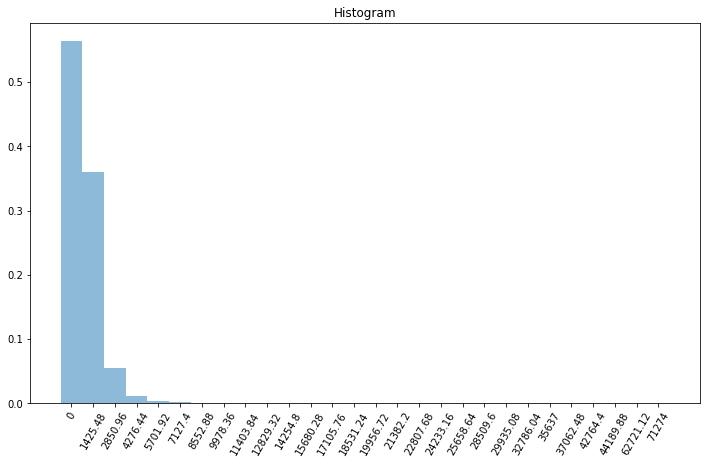

In [47]:
variable.histogram()

In [48]:
variable.describe()

avg                    1.564793e+03
max                    7.127400e+04
min                    0.000000e+00
sum                    3.398448e+08
range                  7.127400e+04
stdev                  1.098193e+03
q1                     8.670000e+02
q3                     1.490000e+03
median                 1.149000e+03
interquartile_range    6.230000e+02
dtype: float64

### Subscribe to a Dataset in the catalog

Once you have explored the catalog and have detected a dataset with the variables you need for your analysis and the right spatial resolution, you have to look at the `is_public_data` to know if you can just use it from CARTOframes or you first need to subscribe for a license.

Subscriptions to datasets allow you to use them from CARTOframes to enrich your own data or to download them. See the enrichment guides for more information about this.

Let's see the dataset and geography in our previous example:

In [50]:
dataset = Dataset.get('ags_sociodemogr_e92b1637')

In [55]:
dataset.is_public_data

False

In [56]:
from cartoframes.data.observatory import Geography
geography = Geography.get(dataset.geography)

In [57]:
geography.is_public_data

False

Both `dataset` and `geography` are not public data, that means you need a subscription to be able to use them to enrich your own data.

**To subscribe to data in the Data Observatory catalog you need a CARTO account with access to Data Observatory**

In [60]:
from cartoframes.auth import Credentials
credentials = Credentials(username='cartoframes-testing', api_key='931150443b7aa3bb05d47c8e86b88ce8cbca3954')
dataset.subscribe(credentials)

HTML(value='\n    <h3>Subscription contract</h3>\n    You are about to subscribe to <b>carto-do.ags.demographi…

GridspecLayout(children=(Button(button_style='info', description='Yes', layout=Layout(grid_area='widget001', h…

In [61]:
geography.subscribe(credentials)

HTML(value='\n    <h3>Subscription contract</h3>\n    You are about to subscribe to <b>carto-do.ags.geography_…

GridspecLayout(children=(Button(button_style='info', description='Yes', layout=Layout(grid_area='widget001', h…

**Licenses to data in the Data Observatory grant you the right to use the data subscribed for the period of one year. Every dataset or geography you want to use to enrich your own data, as lons as they are not public data, require a valid license.**

You can check the actual status of your subscriptions directly from the catalog.

In [65]:
Catalog().subscriptions(credentials)

Datasets: None
Geographies: None

### Other entities in the Catalog

We've seen through a use case how to explore and search the catalog to discover a dataset for the US with population data and get a valid license for it.

Besides that, the Data Observatory catalog contains some other entities so you can explore and discover the data you need for your analyses.

Let's take as examples the `Country` and `Category` entities.

**List all the available countries and categories in the catalog**

In [68]:
from cartoframes.data.observatory import Country, Category
Country.get_all()

[<Country.get('tjk')>,
 <Country.get('gtm')>,
 <Country.get('tca')>,
 <Country.get('prt')>,
 <Country.get('gab')>,
 <Country.get('bwa')>,
 <Country.get('aia')>,
 <Country.get('twn')>,
 <Country.get('nzl')>,
 <Country.get('ury')>,
 <Country.get('png')>,
 <Country.get('nga')>,
 <Country.get('svn')>,
 <Country.get('swe')>,
 <Country.get('qat')>,
 <Country.get('ven')>,
 <Country.get('ago')>,
 <Country.get('swz')>,
 <Country.get('khm')>,
 <Country.get('tza')>,
 <Country.get('omn')>,
 <Country.get('uga')>,
 <Country.get('mrt')>,
 <Country.get('gnq')>,
 <Country.get('mkd')>,
 <Country.get('bel')>,
 <Country.get('aze')>,
 <Country.get('pyf')>,
 <Country.get('ecu')>,
 <Country.get('msr')>,
 <Country.get('vir')>,
 <Country.get('irn')>,
 <Country.get('jpn')>,
 <Country.get('pak')>,
 <Country.get('phl')>,
 <Country.get('guy')>,
 <Country.get('tto')>,
 <Country.get('jam')>,
 <Country.get('ner')>,
 <Country.get('fji')>,
 <Country.get('srb')>,
 <Country.get('mmr')>,
 <Country.get('cpv')>,
 <Country.g

In [69]:
Category.get_all()

[<Category.get('demographics')>,
 <Category.get('environmental')>,
 <Category.get('financial')>,
 <Category.get('housing')>,
 <Category.get('human_mobility')>,
 <Category.get('points_of_interest')>,
 <Category.get('road_traffic')>]

You can convert those lists to a pandas `DataFrame` for further filtering:

In [71]:
cdf = Category.get_all().to_dataframe()
cdf

,id,name
0,demographics,Demographics
1,environmental,Environmental
2,financial,Financial
3,housing,Housing
4,human_mobility,Human Mobility
5,points_of_interest,Points of Interest
6,road_traffic,Road Traffic


Or you can get a single entity with the `get` method, looking by `id` or `slug` (in the case the entity has one):

In [73]:
category = Category.get_all().get('demographics')
category

<Category.get('demographics')>

You can achieve the same result by using the `get` method in an entity:

In [74]:
Category.get('demographics')

<Category.get('demographics')>

Every entity can be converted to a pandas `Series` object or a dict, to see their related metadata:

In [75]:
Category.get('demographics').to_series()

id      demographics
name    Demographics
dtype: object

In [76]:
Category.get('demographics').to_dict()

{'id': 'demographics', 'name': 'Demographics'}

### Learn more

We recommend you to check also these resources if you want to know more about the Data Observatory catalog:

- The CARTOframes Enrichment guides and examples
- [our public website](https://carto.com/platform/location-data-streams/)
- Your user dashboard: Under the data section
- The CARTOframes catalog reference 